# 1. PBMC data of immune cells from young and old, male and female samples

Huang, Zhaohao, Binyao Chen, Xiuxing Liu, He Li, Lihui Xie, Yuehan Gao, Runping Duan, et al. 2021. “Effects of Sex and Aging on the Immune Cell Landscape as Assessed by Single-Cell Transcriptomic Analysis.” Proceedings of the National Academy of Sciences of the United States of America 118 (33). https://doi.org/10.1073/pnas.2023216118.

In [1]:
import os
import sys
import pandas as pd

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [33]:
pbmc_counts = pd.read_csv("data/pbmc_counts.tsv", sep="\t")

In [4]:
pbmc_counts.head()

,Sample,Condition,Sex,Age,B cells,Dendritic cells,Monocytes,NK cells,T cells
0,OF1,OF,Female,Old,1449,135,1342,1328,4574
1,OF2,OF,Female,Old,677,148,2159,746,5097
2,OF3,OF,Female,Old,552,124,1507,1108,5535
3,OF4,OF,Female,Old,666,146,1277,589,6151
4,OF5,OF,Female,Old,653,137,2027,1632,4379


In [5]:
# Convert count matrix to long format
pbmc = convert_counts_to_df(pbmc_counts, column_name="Celltype")
pbmc.head()

,Sample,Condition,Sex,Age,Celltype
cell_1,OF1,OF,Female,Old,B cells
cell_2,OF1,OF,Female,Old,B cells
cell_3,OF1,OF,Female,Old,B cells
cell_4,OF1,OF,Female,Old,B cells
cell_5,OF1,OF,Female,Old,B cells


-------

## Run Scanpro

### Young vs Old

In [6]:
pbmc_young_old = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Age')
pbmc_young_old.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Old,mean_props_Young,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.098383,0.094222,0.102401,0.920131,-0.820489,0.415800,0.519750
Dendritic cells,0.017112,0.016362,0.018018,0.908097,-0.251112,0.802748,0.802748
Monocytes,0.171416,0.196655,0.143211,1.373180,2.608123,0.011948,0.059738
NK cells,0.146479,0.158121,0.133477,1.184627,1.081533,0.284606,0.474344
T cells,0.566610,0.534640,0.602892,0.886791,-1.780506,0.081019,0.202548


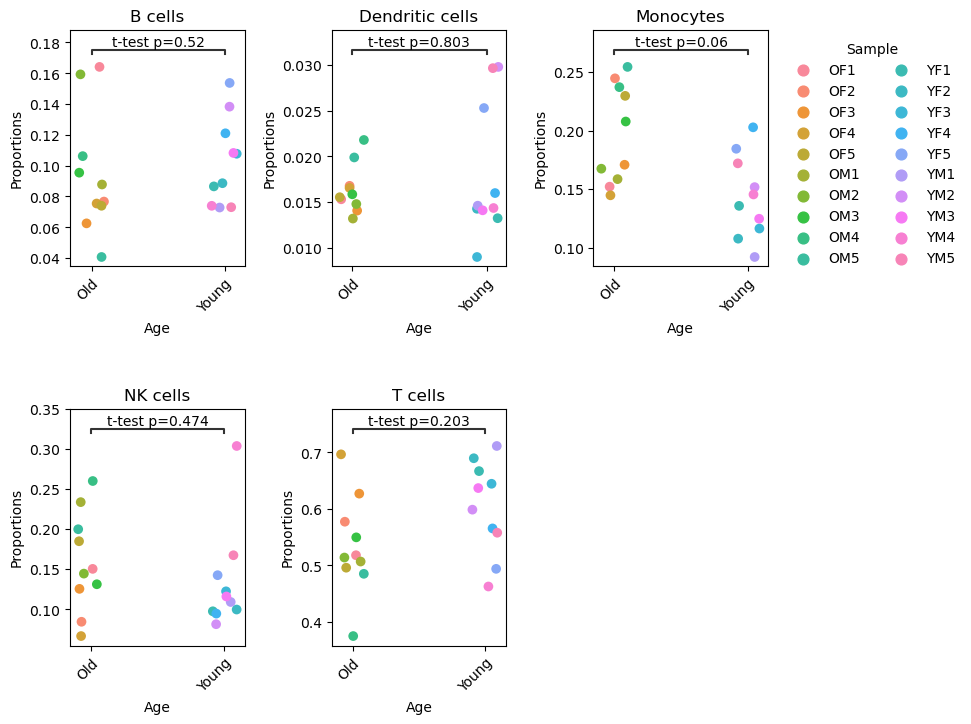

In [7]:
pbmc_young_old.plot(save="plots/pbmc_age_stripplot.pdf")

#### With sex as covariate

In [8]:
pbmc_young_old_sex = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Age', 
                             covariates=["Sex"])
pbmc_young_old_sex.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Old,mean_props_Young,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.098383,0.094222,0.102401,0.920131,-0.847305,0.399205,0.499006
Dendritic cells,0.017112,0.016362,0.018018,0.908097,-0.240203,0.810751,0.810751
Monocytes,0.171416,0.196655,0.143211,1.373180,2.446304,0.016494,0.082471
NK cells,0.146479,0.158121,0.133477,1.184627,1.220507,0.225648,0.376080
T cells,0.566610,0.534640,0.602892,0.886791,-1.782987,0.078158,0.195396


### Male vs Female

In [9]:
pbmc_male_female = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex')
pbmc_male_female.results.to_csv("results/pbmc_scanpro_rep_logit.tsv", sep="\t")
pbmc_male_female.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Female,mean_props_Male,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.098383,0.101042,0.095581,1.057138,0.453598,0.651210,0.814013
Dendritic cells,0.017112,0.015587,0.018793,0.829422,-1.054917,0.294287,0.490479
Monocytes,0.171416,0.168821,0.171046,0.986995,-0.063599,0.949430,0.949430
NK cells,0.146479,0.116914,0.174684,0.669285,-2.636203,0.009874,0.049371
T cells,0.566610,0.597636,0.539896,1.106946,1.447690,0.151178,0.377946


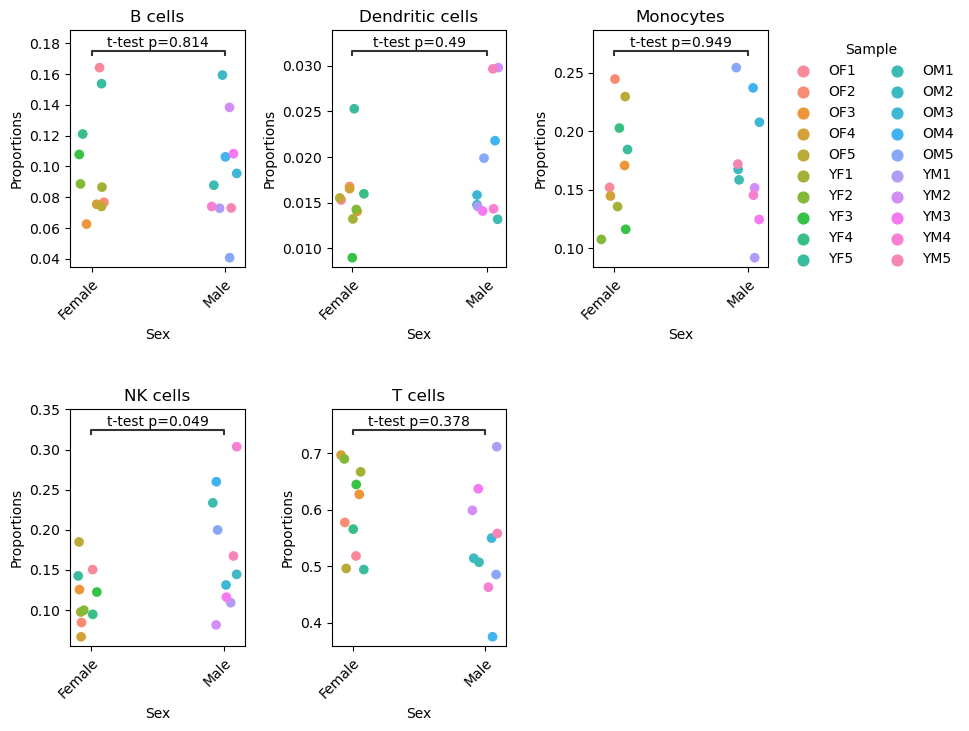

In [10]:
pbmc_male_female.plot(save=f"{FIG_PATH}/pbmc_sex_stripplot.pdf")

In [11]:
pbmc_male_female_arcsin = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex', transform="arcsin")
pbmc_male_female_arcsin.results.to_csv("results/pbmc_scanpro_rep_arcsin.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


#### With age as covariate

In [12]:
pbmc_male_female_age = scanpro(pbmc, samples_col='Sample', clusters_col='Celltype', conds_col='Sex', covariates="Age")
pbmc_male_female_age.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_Female,mean_props_Male,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.098383,0.101042,0.095581,1.057138,0.466193,0.642270,0.802838
Dendritic cells,0.017112,0.015587,0.018793,0.829422,-1.094385,0.276878,0.461463
Monocytes,0.171416,0.168821,0.171046,0.986995,-0.066020,0.947517,0.947517
NK cells,0.146479,0.116914,0.174684,0.669285,-2.699387,0.008380,0.041900
T cells,0.566610,0.597636,0.539896,1.106946,1.496382,0.138258,0.345645


## Run Scanpro without replicates

In [13]:
pbmc_male_female_norep = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex')
pbmc_male_female_norep.results.to_csv("results/pbmc_scanpro_norep_logit.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 43.42 seconds


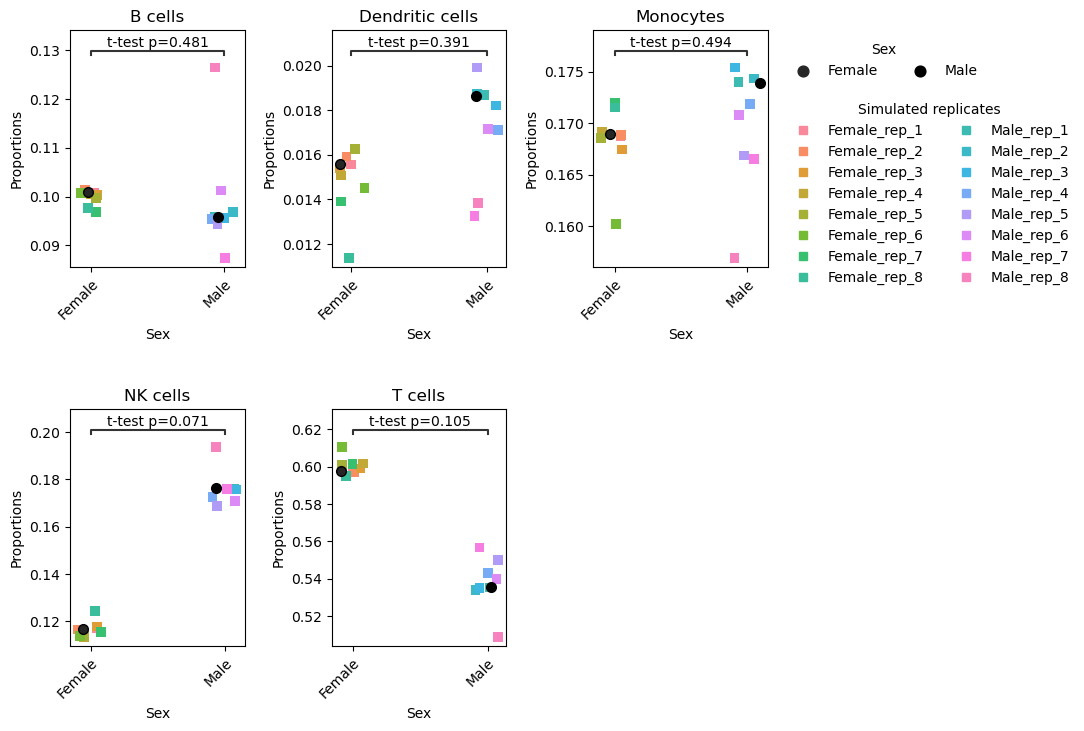

In [14]:
pbmc_male_female_norep.plot(save="plots/pbmc_sex_norep_stripplot.pdf")

In [15]:
pbmc_male_female_norep_arcsin = scanpro(pbmc, clusters_col='Celltype', conds_col='Sex', transform="arcsin")
pbmc_male_female_norep_arcsin.results.to_csv("results/pbmc_scanpro_norep_arcsin.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 42.86 seconds


-----------------------

## Run propeller

In [16]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [17]:
%%R -i pbmc -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = pbmc$Celltype, sample = pbmc$Sample, group = pbmc$Sex, transform="logit")
propeller_results_arcsin = propeller(clusters = pbmc$Celltype, sample = pbmc$Sample, group = pbmc$Sex, transform="asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
Performing logit transformation of proportions
group variable has 2 levels, t-tests will be performed
Performing arcsin square root transformation of proportions
group variable has 2 levels, t-tests will be performed


In [18]:
propeller_results_logit

,BaselineProp.clusters,BaselineProp.Freq,PropMean.Female,PropMean.Male,PropRatio,Tstatistic,P.Value,FDR
NK cells,NK cells,0.146479,0.116914,0.174684,0.669285,-2.637317,0.009844,0.049221
T cells,T cells,0.566610,0.597636,0.539896,1.106946,1.448420,0.150975,0.377437
Dendritic cells,Dendritic cells,0.017112,0.015587,0.018793,0.829422,-1.052536,0.295371,0.492285
B cells,B cells,0.098383,0.101042,0.095581,1.057138,0.453546,0.651248,0.814059
Monocytes,Monocytes,0.171416,0.168821,0.171046,0.986995,-0.063694,0.949355,0.949355


In [19]:
propeller_results_logit.to_csv("results/pbmc_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/pbmc_propeller_rep_arcsin.tsv", sep="\t")

-------------

## Run scCODA

### Data preparation

In [20]:
import pertpy as pt
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

Global seed set to 0
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [21]:
sccoda_adata = ad.AnnData(obs=pbmc)

### With replicates

In [22]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Sample", covariate_obs=["Sex"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Sex", reference_cell_type="Monocytes")

<Axes: xlabel='Cell type', ylabel='Proportion'>

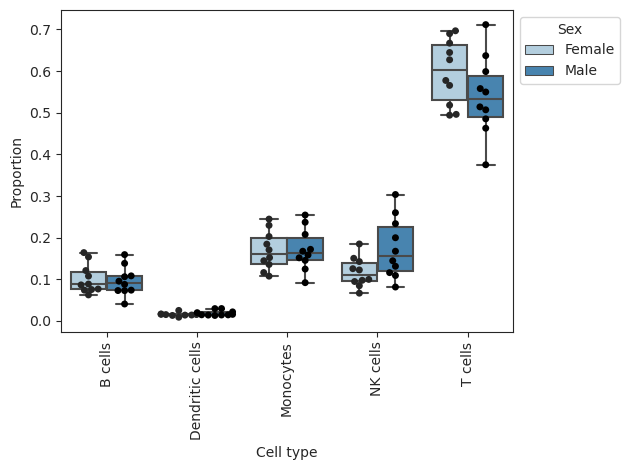

In [23]:
pt.pl.coda.boxplots(sccoda_data, modality_key="coda", feature_name="Sex", add_dots=True)

In [24]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
sample: 100%|██████████| 11000/11000 [01:11<00:00, 153.15it/s, 95 steps of size 3.74e-02. acc. prob=0.77] 


In [25]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 20 samples, 5 cell types                                    │
│ Reference cell type                         │ Monocytes                                                         │
│ Formula                                     │ Sex                                                               │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                  Final Parameter  Expected Sample                                                               │
│ Cell Type                                                                                                       │
│ B cells              1.870            866.777                                                                   │
│ Dendritic cells      0.391            197.509                                                                   │
│ Monocytes            2.396           1466.717                                                                   │
│ NK cells             2.115           1107.413                                                                   │
│ T cells              3.639           5083.635                                                                   │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate Cell Type                                                                                             │
│ SexT.Male B cells              0.000            866.777           0.000                                         │
│           Dendritic cells      0.000            197.509           0.000                                         │
│           Monocytes            0.000           1466.717           0.000                                         │
│           NK cells             0.000           1107.413           0.000                                         │
│           T cells              0.000           5083.635           0.000                                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [26]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate   Cell Type                             
Sex[T.Male] B cells                    False  0.01
            Dendritic cells            False  0.01
            Monocytes                  False  0.01
            NK cells                   False  0.01
            T cells                    False  0.01
            B cells                    False  0.05
            Dendritic cells            False  0.05
            Monocytes                  False  0.05
            NK cells                   False  0.05
            T cells                    False  0.05
            B cells                    False  0.10
            Dendritic cells            False  0.10
            Monocytes                  False  0.10
            NK cells                   False  0.10
            T cells                    False  0.10
            B cells                    False  0.20
            Dendritic cells            False  0.20
            Monocytes                  False  0.20
            NK cells                   False  0.20
            T cells                    False  0.20
            B cells                    False  0.30
            Dendritic cells            False  0.30
            Monocytes                  False  0.30
            NK cells                    True  0.30
            T cells                    False  0.30
            B cells                    False  0.40
            Dendritic cells            False  0.40
            Monocytes                  False  0.40
            NK cells                    True  0.40
            T cells                     True  0.40

In [27]:
credible_effects.to_csv("results/pbmc_sccoda_rep.tsv", sep="\t")

### Without replicates

In [28]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Sex", covariate_obs=["Sex"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Sex", reference_cell_type="Monocytes")

In [29]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [00:11<00:00, 932.59it/s, 1 steps of size 5.66e-02. acc. prob=0.29] 


In [30]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 2 samples, 5 cell types                                    │
│ Reference cell type                          │ Monocytes                                                        │
│ Formula                                      │ Sex                                                              │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                  Final Parameter  Expected Sample                                                               │
│ Cell Type                                                                                                       │
│ B cells              4.165          10318.304                                                                   │
│ Dendritic cells      2.026           1215.213                                                                   │
│ Monocytes            5.120          26813.873                                                                   │
│ NK cells             4.664          16995.004                                                                   │
│ T cells              5.293          31878.105                                                                   │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate Cell Type                                                                                             │
│ SexT.Male B cells              0.000          10318.304           0.000                                         │
│           Dendritic cells      0.000           1215.213           0.000                                         │
│           Monocytes            0.000          26813.873           0.000                                         │
│           NK cells             0.000          16995.004           0.000                                         │
│           T cells              0.000          31878.105           0.000                                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [31]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate   Cell Type                             
Sex[T.Male] B cells                    False  0.01
            Dendritic cells            False  0.01
            Monocytes                  False  0.01
            NK cells                   False  0.01
            T cells                    False  0.01
            B cells                    False  0.05
            Dendritic cells            False  0.05
            Monocytes                  False  0.05
            NK cells                   False  0.05
            T cells                    False  0.05
            B cells                    False  0.10
            Dendritic cells            False  0.10
            Monocytes                  False  0.10
            NK cells                   False  0.10
            T cells                    False  0.10
            B cells                    False  0.20
            Dendritic cells            False  0.20
            Monocytes                  False  0.20
            NK cells                   False  0.20
            T cells                    False  0.20
            B cells                    False  0.30
            Dendritic cells            False  0.30
            Monocytes                  False  0.30
            NK cells                   False  0.30
            T cells                     True  0.30
            B cells                    False  0.40
            Dendritic cells             True  0.40
            Monocytes                  False  0.40
            NK cells                   False  0.40
            T cells                     True  0.40

In [32]:
credible_effects.to_csv("results/pbmc_sccoda_norep.tsv", sep="\t")